# Exercise - Dynamic models and model selection

**(1)** Fit the following ARDL models:

> **(a)** $y_t = \alpha + \beta_1 y_{t-1} + \beta_2 ipr_t + \beta_2 ipr_{t-1} + \beta_3 su_t + \beta_4 su_{t-1} + \beta_5 sr_t + \beta_6 sr_{t-1} + \epsilon_T$

> **(b)** $y_t = \alpha + \beta_1 y_{t-1} + \epsilon_t$

> **(c)** $y_t = \alpha + \beta_1 ydiff_{t-1} + \beta_2 iprdiff_t + \beta_3 sudiff_t + \beta_4 srdiff_t + \epsilon_t$

> **(d)** $y_t = \alpha + \beta_1 ipr_{t-1} + \beta_2 su_{t-1} + \beta_3 sr_{t-1} + \epsilon_t$

> **(e)** $y_t = \alpha + \beta_1 ipr_T + \beta_2 ipr_{t-1} + \beta_3 su_t + \beta_4 su_{t-1} + \beta_5 sr_t + \beta_6 sr_{t-1} + \epsilon_T$

> **(f)** $y_t = \alpha + \beta_1 y_{t-1} + \beta_2 ipr_t + \beta_3 su_t + \beta_4 sr_t + \epsilon_t$

> **(g)** $y_t = \alpha + \beta_1 ipr_{t-1} + \beta_2 su_{t-1} + \beta_3 sr_{t-1} + \epsilon_t$

> **(h)** $y_t = \alpha + \beta_1 ipr_t + \beta_2 su_t + \beta_3 sr_t + \epsilon_t$ onde $\epsilon_t = \rho \epsilon_{t-1} + u_{t-1}$


**(2)** Test the optimal ARDL model specification chosen before in terms of:
> **(a)** AIC and BIC

> **(b)** Serial autocorrelation 

> **(c)** Homoskedasticity

**(3)** Use the optimal model to make:
> **(a)** Static forecast 

> **(b)** Recursive forecast

> **(c)** Evaluate the forecasts in terms of RMSE and MAE



In [144]:
library(urca)
library(readxl)
library(vars)
library(tsDyn)
library(nlme)
library(data.table)
library(ggplot2)
library(lmtest)
library(tseries)
library(xtable)
library(forecast)
library(Metrics)
library(here)
library(reshape2)
library(Metrics)

In [16]:
us_gdp = fread(here('src', 'data', 'ex2_dynamic_gdp_us.csv'))
us_gdp$d1ipr=c(NA,diff(us_gdp$ipr,differences=1)[1:length(us_gdp$ipr)-1])
us_gdp$d1su=c(NA,diff(us_gdp$su,differences=1)[1:length(us_gdp$su)-1])
us_gdp$d1sr=c(NA,diff(us_gdp$sr,differences=1)[1:length(us_gdp$sr)-1])
head(us_gdp)

date,D2000s,Dfincris,ipr,pr,q_cpi_infl,q_csi_gr,q_indpro_gr,q_rgdp_gr,q_sp500_ret,sr,su,y,y1,ipr1,su1,sr1,d1ipr,d1su,d1sr
1/1/1985,0,0,0.2794038,1.2218198,0.012218198,-0.005291005,0.002794038,0.009843438,0.06961191,6.961191,-0.5291005,0.9843438,0.0000000,0.0000000,0.0000000,0.000000,NA,NA,NA
4/1/1985,0,0,0.0910985,0.6525528,0.006525528,-0.002120891,0.000910985,0.009071856,0.04223191,4.223191,-0.2120891,0.9071856,0.9843438,0.2794038,-0.5291005,6.961191,-0.18830526,0.3170115,-2.738000
7/1/1985,0,0,-0.1680275,0.5560717,0.005560717,-0.016163793,-0.001680275,0.015318746,0.02042328,2.042328,-1.6163793,1.5318746,0.9071856,0.0910985,-0.2120891,4.223191,-0.25912600,-1.4042902,-2.180863
10/1/1985,0,0,0.5959753,1.2840002,0.012840002,-0.018660812,0.005959753,0.007445974,0.04189470,4.189470,-1.8660812,0.7445974,1.5318746,-0.1680275,-1.6163793,2.042328,0.76400285,-0.2497019,2.147142
1/1/1986,0,0,0.5809237,-0.3683023,-0.003683023,0.046073298,0.005809237,0.009183453,0.11048801,11.048801,4.6073298,0.9183453,0.7445974,0.5959753,-1.8660812,4.189470,-0.01505166,6.4734111,6.859331
4/1/1986,0,0,-0.5914638,0.2728748,0.002728748,0.013429752,-0.005914638,0.004569657,0.09111486,9.111486,1.3429752,0.4569657,0.9183453,0.5809237,4.6073298,11.048801,-1.17238744,-3.2643546,-1.937315


In [46]:
dim(us_gdp)

[1] 114  20

### **(1)** Fit the following ARDL models:

In [10]:
model_list = list()
aic_bic_list = list()

In [11]:
l = list()
model_list$ardl1111 = lm(y ~ y1 + ipr + ipr1 + su + su1 + sr + sr1, us_gdp[2:70] )

l$AIC = AIC(model_list$ardl1111)/model_list$ardl1111$df.residual
l$BIC = BIC(model_list$ardl1111)/model_list$ardl1111$df.residual

aic_bic_list[['arfl1111']] = l

In [13]:
l = list()
model_list$ar1 = lm(y ~ y1 , us_gdp[2:70] )

l$AIC = AIC(model_list$ar1)/model_list$ar1$df.residual
l$BIC = BIC(model_list$ar1)/model_list$ar1$df.residual

aic_bic_list[['ar1']] = l

In [18]:
l = list()
model_list$diffmodel = lm(y ~ offset(1*y1)+ d1ipr + d1su + d1sr, data = us_gdp[2:70])

l$AIC = AIC(model_list$diffmodel)/model_list$diffmodel$df.residual
l$BIC = BIC(model_list$diffmodel)/model_list$diffmodel$df.residual

aic_bic_list[['diffmodel']] = l

In [19]:
l = list()
model_list$leadingindcmodels = lm(y ~ ipr1 + su1 + sr1, data = us_gdp[2:70])

l$AIC = AIC(model_list$leadingindcmodels)/model_list$leadingindcmodels$df.residual
l$BIC = BIC(model_list$leadingindcmodels)/model_list$leadingindcmodels$df.residual

aic_bic_list[['leadingindcmodels']] = l

In [20]:
l = list()
model_list$distlagsmodel = lm(y ~ ipr + ipr1 + su + su1 + sr + sr1, data = us_gdp[2:70])

l$AIC = AIC(model_list$distlagsmodel)/model_list$distlagsmodel$df.residual
l$BIC = BIC(model_list$distlagsmodel)/model_list$distlagsmodel$df.residual

aic_bic_list[['distlagsmodel']] = l

In [21]:
l = list()
model_list$partialadjmodel = lm(y ~ y1 + ipr + su + sr, data = us_gdp[2:70])

l$AIC = AIC(model_list$partialadjmodel)/model_list$partialadjmodel$df.residual
l$BIC = BIC(model_list$partialadjmodel)/model_list$partialadjmodel$df.residual

aic_bic_list[['partialadjmodel']] = l

In [22]:
l = list()
model_list$deadstartmodel = lm(y ~ y1 + ipr1+su1+sr1, data = us_gdp[2:70])

l$AIC = AIC(model_list$deadstartmodel)/model_list$deadstartmodel$df.residual
l$BIC = BIC(model_list$deadstartmodel)/model_list$deadstartmodel$df.residual

aic_bic_list[['deadstartmodel']] = l

In [23]:
l = list()
model_list$staticar1errormodel = gls(y ~ ipr+ su + sr, correlation =corARMA(p=1,q=0), data = us_gdp[2:70])


l$AIC = AIC(model_list$staticar1errormodel)/model_list$staticar1errormodel$dims$N
l$BIC = BIC(model_list$staticar1errormodel)/model_list$staticar1errormodel$dims$N

aic_bic_list[['staticar1errormodel']] = l

### **(2)** Test the optimal ARDL model specification chosen before in terms of:
#### **(a)** AIC and BIC

In [25]:
do.call('cbind', aic_bic_list)

,arfl1111,ar1,diffmodel,leadingindcmodels,distlagsmodel,partialadjmodel,deadstartmodel,staticar1errormodel
AIC,1.321763,1.595614,1.91836,1.548655,1.269619,1.202951,1.602026,1.475424
BIC,1.651385,1.695648,2.090214,1.720509,1.557891,1.412398,1.811473,1.664501


Its possible to note that both in terms of AIC and BIC, the "partialadjmodel" is the best fit between the available models.

In [31]:
name = 'ardl1111'
modd = model_list[[name]]
test = bgtest(modd)
test$p.value

[1] 0.1181348

#### **(b)** Serial autocorrelation 

##### Breusch-Godfrey test

In [38]:
bg_pval_list = list()
for (name in names(model_list)){
    if (name != 'staticar1errormodel'){
        modd = model_list[[name]]
        test = bgtest(modd)
        bg_pval_list[[name]] = test$p.value
    }
}

In [39]:
do.call('cbind', bg_pval_list)

ardl1111,ar1,diffmodel,leadingindcmodels,distlagsmodel,partialadjmodel,deadstartmodel
0.1181348,0.004092259,0.001621425,0.8473626,0.9756159,0.05682203,0.09822227


#### **(c)** Homoskedasticity
##### Breusch-Pagan-Godfrey test

In [40]:
bp_pval_list = list()
for (name in names(model_list)){
    if (name != 'staticar1errormodel'){
        modd = model_list[[name]]
        test = bptest(modd)
        bp_pval_list[[name]] = test$p.value
    }
}

In [41]:
do.call('cbind', bg_pval_list)

ardl1111,ar1,diffmodel,leadingindcmodels,distlagsmodel,partialadjmodel,deadstartmodel
0.1181348,0.004092259,0.001621425,0.8473626,0.9756159,0.05682203,0.09822227


### **(3)** Use the optimal model to make:
#### **(a)** Static forecast 

In [91]:
yhat_list = list()
yse_list = list()
ylow_list = list()
yup_list = list()

In [92]:
yhat_static_list = list()
yse_static_list = list()
ylow_static_list = list()
yup_static_list = list()
for (name in names(model_list)){    
    modd = model_list[[name]]
    yhat = predict(modd, newdata = us_gdp[71:114])
    yse = sqrt(sum(modd$residuals^2) / 194)
    yup = yhat + 1.96 * yse
    ylow = yhat - 1.96 * yse
    
    yhat_static_list[[name]] = yhat
    yse_static_list[[name]] = yse
    ylow_static_list[[name]] = ylow
    yup_static_list[[name]] = yup
}
yhat_list$static = yhat_static_list
yse_list$static = yse_static_list
ylow_list$static = ylow_static_list
yup_list$static = yup_static_list

#### **(b)** Recursive forecast

In [96]:
yhat_rec_list = list()
yse_rec_list = list()
ylow_rec_list = list()
yup_rec_list = list()

for (name in names(model_list)){
    yrec = rep(0, 43)
    yrec_se = rep(0, 43)
    yrec_up = rep(0, 43)
    yrec_low = rep(0, 43)
    j=0
    for(i in 70:113) {
        if (name == 'ardl1111'){
            modd = lm(y ~ y1 + ipr + ipr1 + su + su1 + sr + sr1, us_gdp[1:i] )
        }
        else if (name == 'ar1'){
            modd = lm(y ~ y1 , us_gdp[2:70] )
        }
        else if (name == 'diffmodel'){
            modd = lm(y ~ offset(1*y1)+ d1ipr + d1su + d1sr, data = us_gdp[1:i])
        } 
        else if (name == 'leadingindcmodels'){
            modd = lm(y ~ ipr1 + su1 + sr1, data = us_gdp[1:i])
        }
        else if (name == 'distlagsmodel'){
            modd = lm(y ~ ipr + ipr1 + su + su1 + sr + sr1, data = us_gdp[1:i])
        }
        else if (name == 'partialadjmodel'){
            modd = lm(y ~ y1 + ipr + su + sr, data = us_gdp[1:i])
        }
        else if (name == 'deadstartmodel'){
            modd = lm(y ~ y1 + ipr1+su1+sr1, data = us_gdp[1:i])
        }else{
            modd = gls(y ~ ipr+ su + sr, correlation =corARMA(p=1,q=0), data = us_gdp[1:i])
        }
        
        yrec[j] = predict(modd, newdata = us_gdp[(i+1)])
        yrec_se[j] = sqrt(sum(modd$residuals^2 / 194))
        yrec_up[j] = yrec[j] + 1.96 * yrec_se[j]
        yrec_low[j] = yrec[j] - 1.96 * yrec_se[j]
        j = j + 1
    }
    yhat_rec_list[[name]] = yrec
    yse_rec_list[[name]] = yrec_se
    ylow_rec_list[[name]] = yrec_up
    yup_rec_list[[name]] = yrec_low
}

yhat_list$rec = yhat_rec_list
yse_list$rec = yse_rec_list
ylow_list$rec = ylow_rec_list
yup_list$rec = yup_rec_list

In [137]:
df_pred_static = as.data.frame(cbind(x=seq(0,43), y1=as.numeric(us_gdp$y[71:114]), apply(as.data.frame(do.call('cbind', yhat_list$static)), 2, function(x) as.numeric(x))))
head(df_pred_static)

x,y1,ardl1111,ar1,diffmodel,leadingindcmodels,distlagsmodel,partialadjmodel,deadstartmodel,staticar1errormodel
0,0.48447144,0.5897923,0.7315114,0.25212932,0.7103918,0.5719030,0.7368504,0.6791389,0.7222742
1,0.06361455,0.3192970,0.7170172,0.09250233,0.2126697,0.3102094,0.5154279,0.1972244,0.5037747
2,0.51532599,0.8061940,0.6220452,0.31914860,0.5650146,0.7917984,0.8174129,0.5409783,0.7325381
3,0.91939767,0.2383447,0.7239799,-0.06443482,0.5967455,0.2242588,0.3658247,0.5840431,0.3841138
4,1.64718905,0.8961957,0.8151641,1.40730977,0.8638199,0.9160632,0.7466897,0.8923029,0.7610559
5,1.15571256,0.8545080,0.9793999,1.71880223,0.8688958,0.8848699,0.7515870,0.9154697,0.8511154


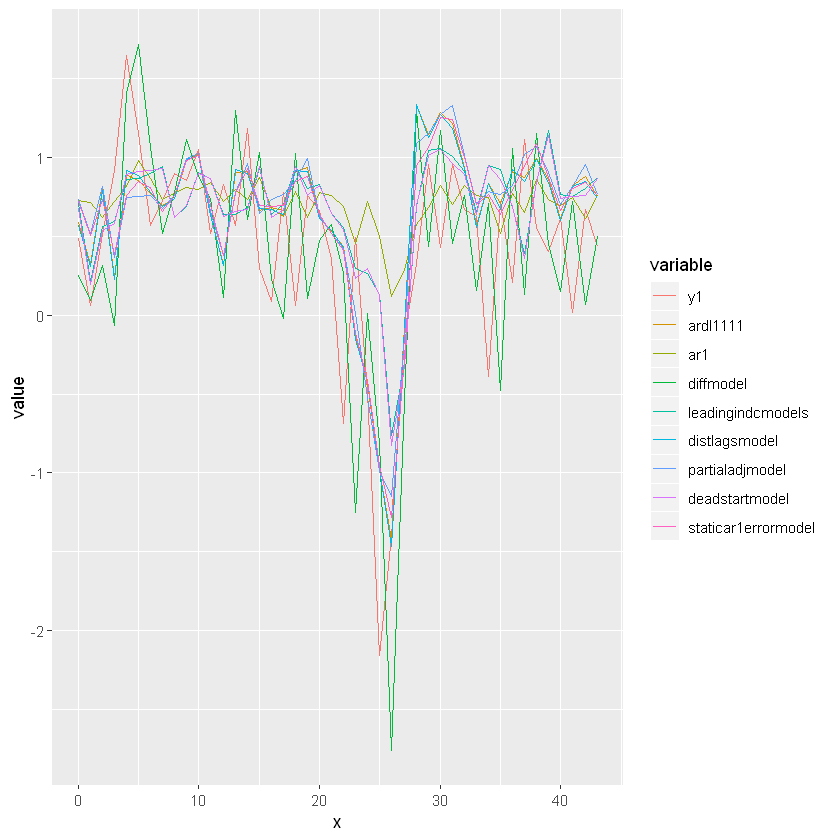

In [140]:
df_pred_static_melt = melt(df_pred_static, id = 'x')
ggplot(data=df_pred_static_melt, aes(x=x, y=value, colour=variable)) + geom_line(size = 0.5)

In [141]:
df_pred_rec = as.data.frame(cbind(x=seq(0,43), y1=us_gdp$y[71:114], do.call('cbind', yhat_list$rec)))
head(df_pred_rec)

Warning message in cbind(x = seq(0, 43), y1 = us_gdp$y[71:114], do.call("cbind", :
"number of rows of result is not a multiple of vector length (arg 1)"

x,y1,ardl1111,ar1,diffmodel,leadingindcmodels,distlagsmodel,partialadjmodel,deadstartmodel,staticar1errormodel
0,0.48447144,0.3321146,0.7170172,0.08336486,0.2038786,0.3229628,0.5106257,0.1945532,0.5003537
1,0.06361455,0.7999185,0.6220452,0.31906484,0.5646590,0.7837419,0.8020542,0.5451764,0.7141356
2,0.51532599,0.2489382,0.7239799,-0.06507569,0.5870324,0.2347526,0.3782265,0.5780550,0.3897277
3,0.91939767,0.8893342,0.8151641,1.34182094,0.8788996,0.9203402,0.7601058,0.9016265,0.7762022
4,1.64718905,0.9023181,0.9793999,1.74383349,0.8890739,0.9222463,0.7938771,0.9528981,0.8806913
5,1.15571256,0.8643829,0.8684917,1.08746441,0.9295203,0.8655400,0.8302863,0.9539046,0.8555888


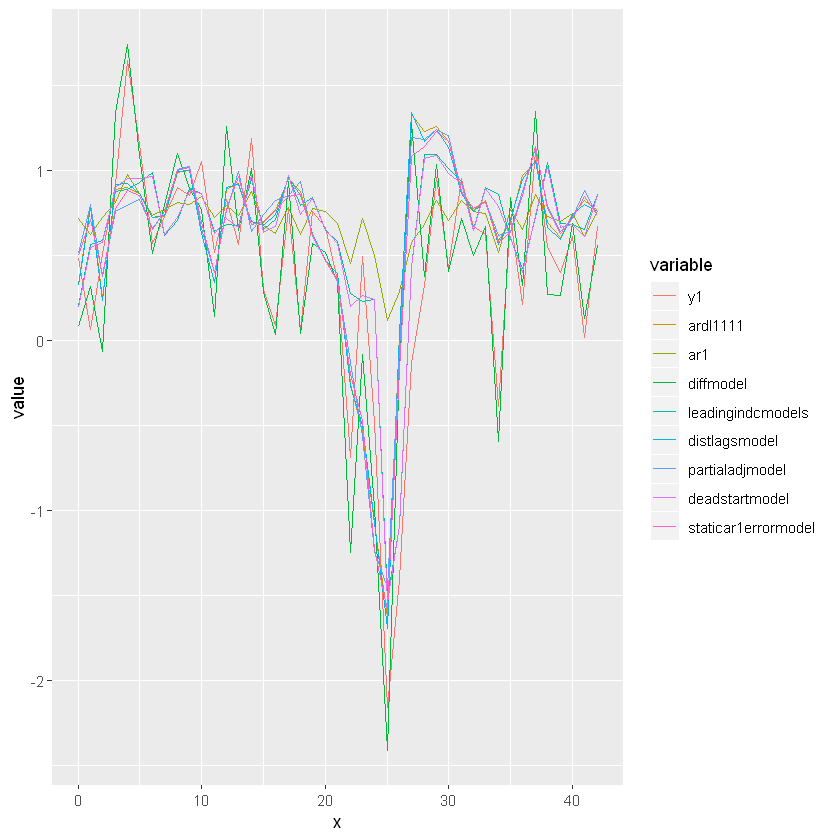

In [143]:
df_pred_rec_melt = melt(df_pred_rec, id = "x")
ggplot(data=df_pred_rec_melt, aes(x=x, y=value, colour=variable)) + geom_line(size = 0.5)

#### **(c)** Evaluate the forecasts in terms of RMSE and MAE

In [148]:
static_list = list()

mae_list = list()
rmse_list = list()
for (col in colnames(df_pred_static)){
    if ((col != 'x') & (col != 'y1')){
        mae_list[[col]] = mae(actual = df_pred_static$y1, predicted = df_pred_static[[col]])
        rmse_list[[col]] = rmse(actual = df_pred_static$y1, predicted = df_pred_static[[col]])
        
        static_list$mae = mae_list
        static_list$rmse = rmse_list
    }
}

In [149]:
do.call('cbind', static_list)

,mae,rmse
ardl1111,0.3772668,0.507392
ar1,0.4459767,0.6611237
diffmodel,0.583082,0.7060951
leadingindcmodels,0.4241683,0.5961608
distlagsmodel,0.3784693,0.5070067
partialadjmodel,0.3816766,0.4982016
deadstartmodel,0.4166691,0.5930113
staticar1errormodel,0.3712139,0.4867612


In [150]:
rec_list = list()

mae_list = list()
rmse_list = list()
for (col in colnames(df_pred_rec)){
    if ((col != 'x') & (col != 'y1')){
        mae_list[[col]] = mae(actual = df_pred_rec$y1, predicted = df_pred_rec[[col]])
        rmse_list[[col]] = rmse(actual = df_pred_rec$y1, predicted = df_pred_rec[[col]])
        
        rec_list$mae = mae_list
        rec_list$rmse = rmse_list
    }
}

In [151]:
do.call('cbind', rec_list)

,mae,rmse
ardl1111,0.4092899,0.5547137
ar1,0.380351,0.586759
diffmodel,0.2492419,0.3820539
leadingindcmodels,0.3394559,0.441702
distlagsmodel,0.3976713,0.5422389
partialadjmodel,0.4190225,0.5628456
deadstartmodel,0.320907,0.4186711
staticar1errormodel,0.3889198,0.5203233


For the static predictions, its possible to see that, in both terms of the MAE an RMSE, the three lowest values are for the "ardl1111model", "distlagsmodel", and "staticar1errormodel". The overall winner for the static pred in both metrics is the "staticar1errormodel".

For the recursive prediction, its possible to see that, in both terms of MAE an RMSe, the three lowest values are for the "diffmodel", "deadstartmodel", and "leadingindcmodels". The overall winer for the static pred is the "diffmodel".